Implement moving average technique using the demand dataset "wsb.csv". This is a demand dataset for "Kesh" a shampoo brand which is sold in 100ml bottles by "We Sell Beauty (WSB)", a manufacturer and distributor of health and beauty products. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wsb.csv to wsb (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/wsb.csv")
df.head()

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1


3. Visualize "Sales Quantity" over "Month"

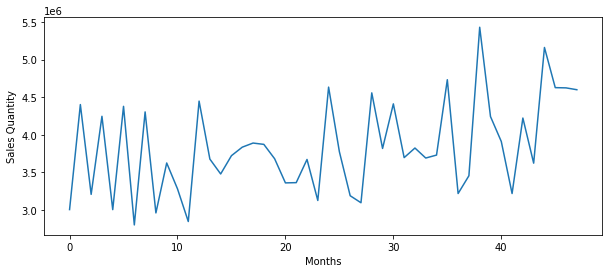

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("Sales Quantity")
plt.plot(df["Sale Quantity"])
plt.show()

Sales quantity has lot of fluctuations. Still has an increasing trend.

4. Forecasting using 12 months Moving Average. Use the rolling() and shift()functions of Pandas. rolling() has a parameter "window" for indicating the time period to be used for forecasting. shift(1) indicates calculate 12 months moving average starting from previous month. Round the forecasted values to two decimal places.

In [ ]:
df['mavg_12'] = df['Sale Quantity'].rolling(window = 12).mean().shift(1)
pd.options.display.float_format = '{:.2f}'.format


5. Print the forecasted sales from month 37 onwards

In [ ]:
df[['Sale Quantity', 'mavg_12']][36:]

,Sale Quantity,mavg_12
36,3216483,3928410.33
37,3453239,3810280.00
38,5431651,3783643.33
39,4241851,3970688.42
40,3909887,4066369.08
41,3216438,4012412.75
42,4222005,3962369.58
43,3621034,3946629.42
44,5162201,3940489.50
45,4627177,4052117.17


6. Plot the actual versus predicted values from moving average forecasting

No handles with labels found to put in legend.


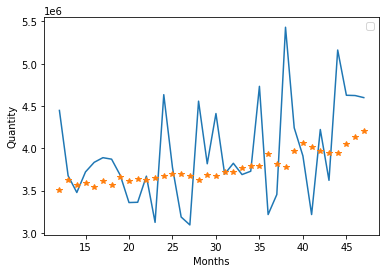

In [ ]:
plt.xlabel("Months")
plt.ylabel("Quantity")
x = df['Sale Quantity'][12:]
y = df['mavg_12'][12:]
plt.plot(x)
plt.plot(y, "*")
plt.legend()
plt.show()

7. Calculate forecast accuracy, using RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
x = df['Sale Quantity'][36:].values
y = df['mavg_12'][36:].values
np.sqrt(mean_squared_error(x,y))

734725.8359239782

This RMSE indicates that the predictions made by the models has a standard deviation of 734725.83

8. Forecast "Sales Quantity" using Exponential Smoothing. The ewm() method in Pandas has features for computing exponential smoothing with "alpha" as a parameter. 

In [ ]:
df["esm"] = df['Sale Quantity'].ewm(alpha = 0.2).mean()
#round the predicted values to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
df[36:][['Month','Sale Quantity', 'mavg_12', 'esm']]

,Month,Sale Quantity,mavg_12,esm
36,37,3216483,3928410.33,3828234.64
37,38,3453239,3810280.00,3753219.93
38,39,5431651,3783643.33,4088961.93
39,40,4241851,3970688.42,4119543.81
40,41,3909887,4066369.08,4077607.99
41,42,3216438,4012412.75,3905359.34
42,43,4222005,3962369.58,3968692.78
43,44,3621034,3946629.42,3899157.24
44,45,5162201,3940489.50,4151776.99
45,46,4627177,4052117.17,4246860.31


9. Calculate the forecast accuracy by exponential smoothing and compare it with that of moving average

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
x = df['Sale Quantity'][36:].values
y = df['esm'][36:].values
np.sqrt(mean_squared_error(x,y))

593857.5336904248

Comparing the RMSE of the two forecasting techniques namely Moving Average and Exponential Smoothing, we can understand, that predictions made by Exponential Smoothing has less standard deviation from the actual values. 